## Hierarchical Clustering

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline
import json

In [13]:
data = pd.read_csv('../result/caseolap.csv')
data = data.set_index('protein')
ndf = data
ndf.head(2)

,CM,ARR,CHD,VD,IHD,CCS,VOO,OHD
protein,,,,,,,,
Q9UKS6,0.000000,0.000000,0.000000,0.00000,0.011396,0.000000,0.0,0.000000
P17612,0.020392,0.007317,0.008494,0.00865,0.016795,0.008234,0.0,0.015174


In [14]:
ndf.shape

(103, 8)

In [15]:
ndata = ndf.copy(deep = True)
ndf.describe()

,CM,ARR,CHD,VD,IHD,CCS,VOO,OHD
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,0.040586,0.030122,0.013245,0.017714,0.032255,0.020019,0.008742,0.036188
std,0.042006,0.038984,0.023948,0.025344,0.037862,0.030506,0.018404,0.040388
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.011260,0.000000,0.000000,0.000000,0.003454,0.000000,0.000000,0.007551
50%,0.022965,0.014980,0.000000,0.008699,0.016795,0.008234,0.000000,0.019759
75%,0.057537,0.036712,0.015549,0.023065,0.047171,0.028596,0.009878,0.050585
max,0.190279,0.166860,0.127304,0.123137,0.140163,0.170617,0.115627,0.179708


#### Clustering

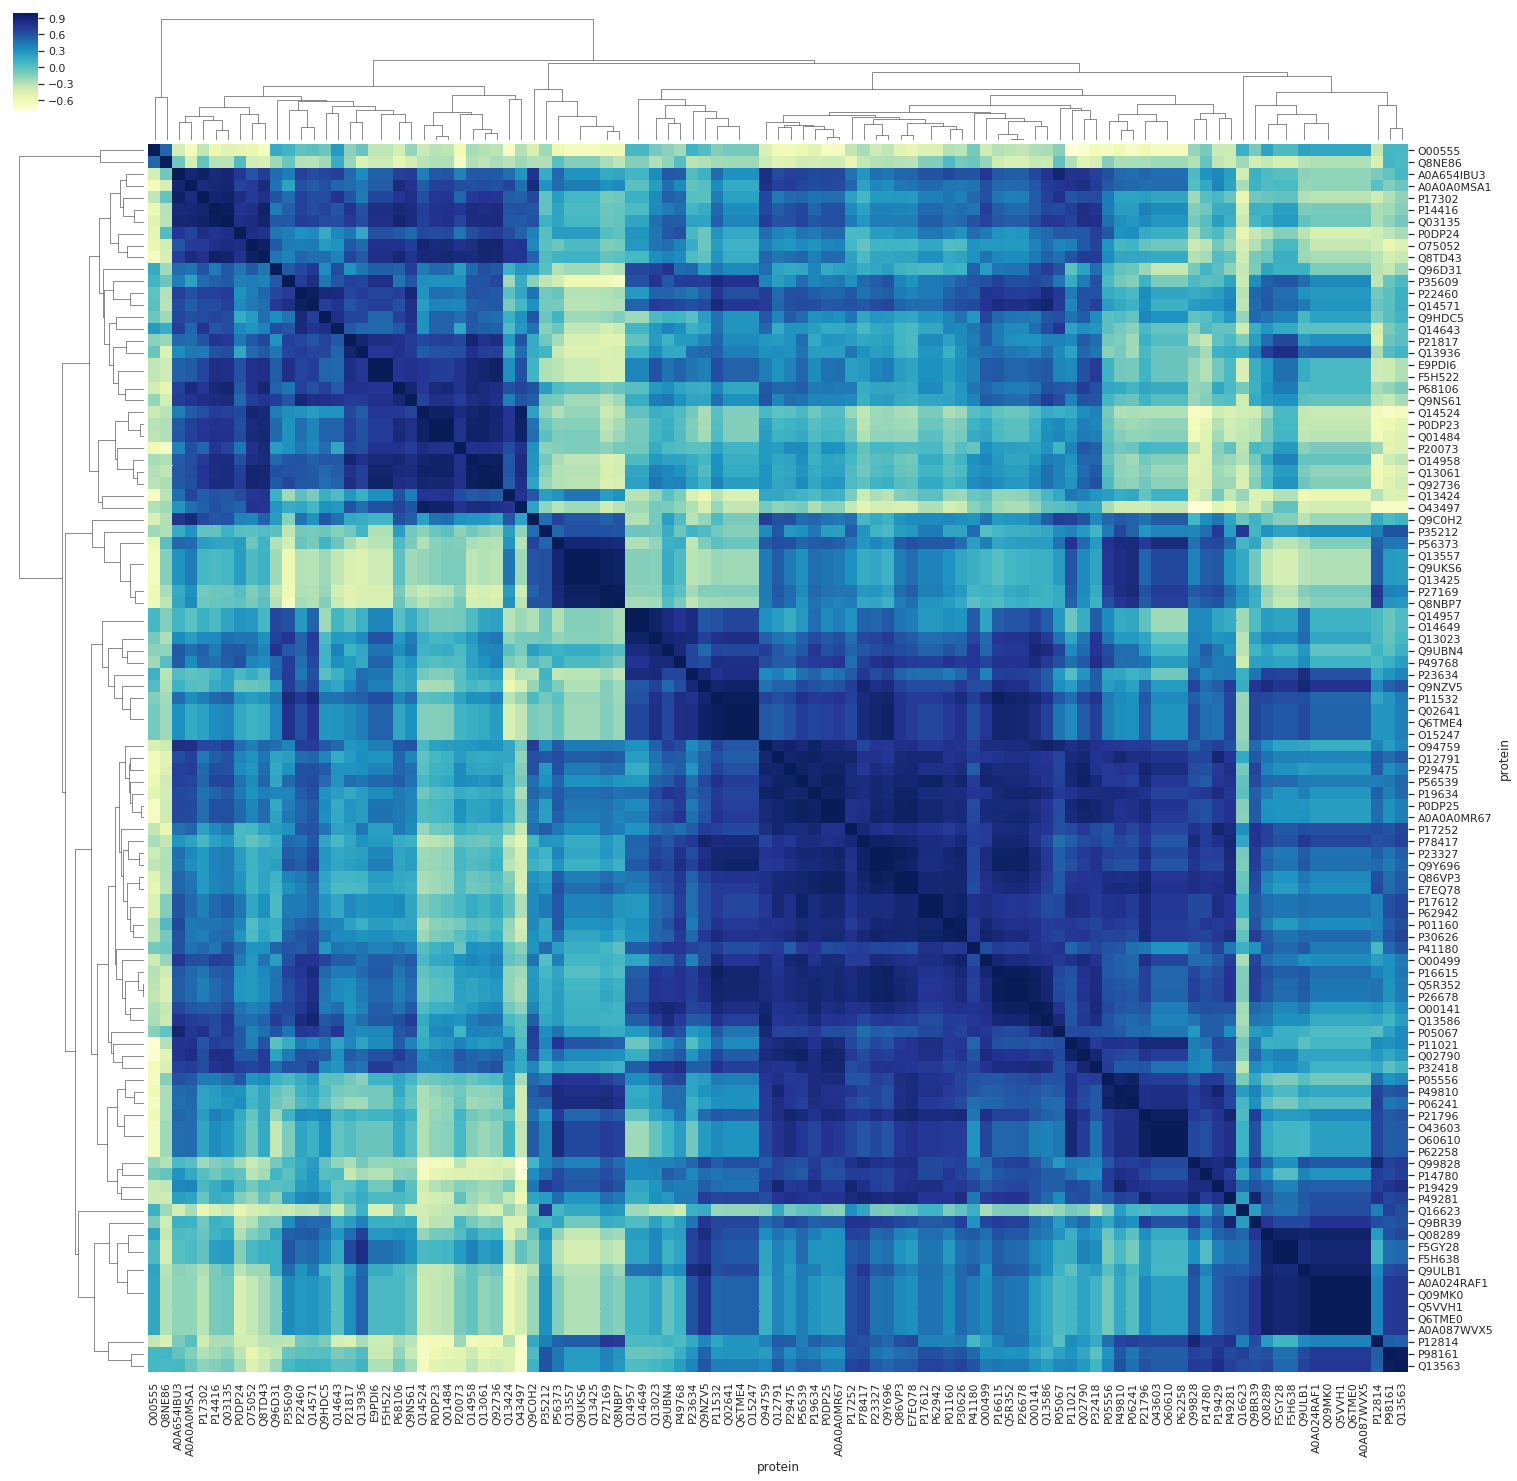

In [16]:
size=(25,25)
g = sns.clustermap(ndf.T.corr(),\
                   figsize=size,\
                   cmap = "YlGnBu",\
                   metric='seuclidean')



g.savefig('plots/cluster.pdf', format='pdf', dpi=300)
g.savefig('plots/cluster.png', format='png', dpi=300)

indx = g.dendrogram_row.reordered_ind

In [17]:
protein_cluster = []
for num in indx:
    for i,ndx in enumerate(ndf.index):
         if num == i:
                protein_cluster.append({'id':i,"protein": ndx,\
                                        'CM' :  list(ndf.loc[ndx,:])[0],\
                                        'ARR':  list(ndf.loc[ndx,:])[1],\
                                        'CHD' : list(ndf.loc[ndx,:])[2],\
                                        'VD' :  list(ndf.loc[ndx,:])[3],\
                                        'IHD' : list(ndf.loc[ndx,:])[4],\
                                        'CCS' : list(ndf.loc[ndx,:])[5],\
                                        'VOO' : list(ndf.loc[ndx,:])[6],\
                                        'OHD' : list(ndf.loc[ndx,:])[7]})
                

In [18]:
protein_cluster_df = pd.DataFrame(protein_cluster)
protein_cluster_df = protein_cluster_df.set_index("protein")

In [19]:
protein_cluster_df = protein_cluster_df.drop(["id"], axis = 1)
protein_cluster_df.head()

,CM,ARR,CHD,VD,IHD,CCS,VOO,OHD
protein,,,,,,,,
O00555,0.102376,0.114271,0.127304,0.123137,0.087749,0.093322,0.115627,0.112454
Q8NE86,0.000000,0.000000,0.044020,0.000000,0.000000,0.000000,0.000000,0.000000
A0A654IBU3,0.098217,0.117211,0.063048,0.017839,0.096145,0.059098,0.020134,0.077645
A0A0A0MSA1,0.011221,0.017533,0.000000,0.000000,0.014445,0.008265,0.000000,0.007505
P17302,0.108147,0.154496,0.089738,0.034155,0.100026,0.098568,0.042160,0.103816


#### Barplot

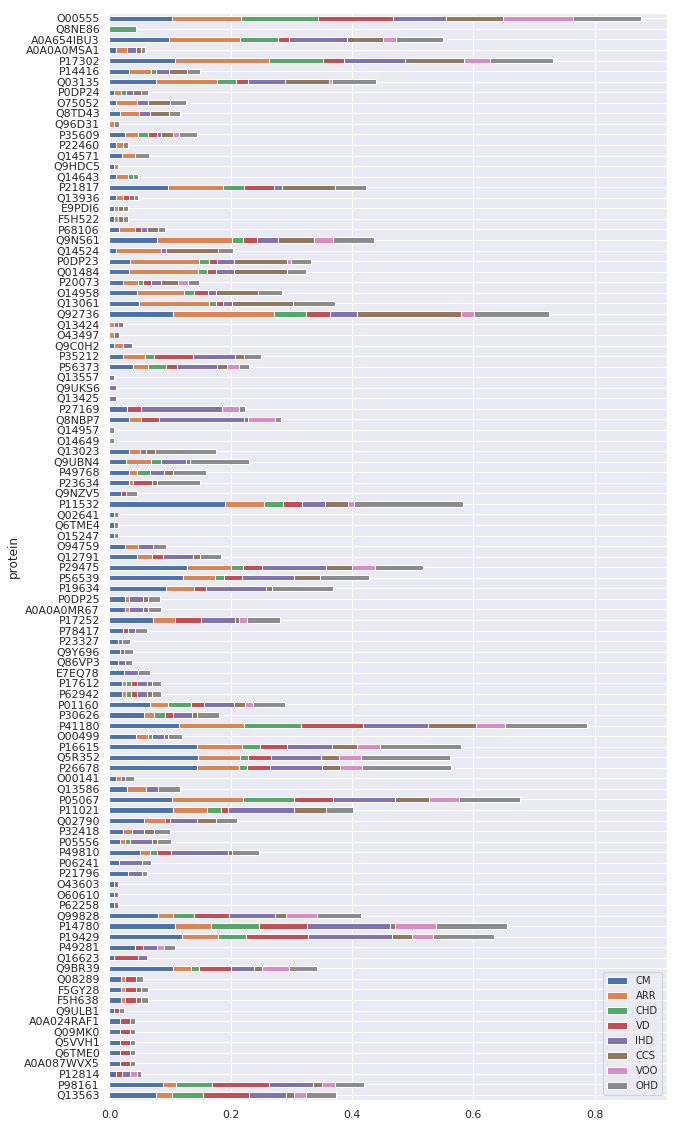

In [20]:
protein_cluster_df.plot.barh(stacked=True,figsize=(10,20))
plt.gca().invert_yaxis()
plt.legend(fontsize =10)
plt.savefig('plots/cluster-bar.pdf')
plt.savefig('plots/cluster-bar.png')

In [21]:
with open("data/id2name.json","r")as f:
    id2name = json.load(f)

names = []
for item in protein_cluster_df.index:
    names.append(id2name[item])

protein_cluster_df['names'] =names
protein_cluster_df.head(1)

FileNotFoundError: [Errno 2] No such file or directory: 'data/id2name.json'

In [ ]:
protein_cluster_df.to_csv("data/protein-cluster-bar-data.csv")